<a href="https://colab.research.google.com/github/Thaizalu/Aprendizado/blob/main/F%C3%B3rum_Data_Science_e_Medicina_CoronaV%C3%ADrus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

In [30]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [31]:
confirmed = confirmed.loc[:, :'8/4/21']
deaths = deaths.loc[:, :'8/4/21']
recovered = recovered.loc[:, :'8/4/21']

In [32]:
def latest_by_country(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

In [33]:
informations = [latest_by_country(confirmed), latest_by_country(deaths), latest_by_country(recovered)]
combined = pd.concat(informations, axis = 1)
combined.columns = ['confirmed', 'deaths', 'recovered']
combined.head()

<ipython-input-32-5f3176a20a3e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]
<ipython-input-32-5f3176a20a3e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]
<ipython-input-32-5f3176a20a3e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby('Country/Region').sum().iloc[:,-1]


,confirmed,deaths,recovered
Country/Region,,,
Afghanistan,148933,6836,82586
Albania,133310,2457,130314
Algeria,176724,4404,118409
Andorra,14797,128,14380
Angola,43158,1026,39582


In [34]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
combined["letality_rate_1"] = letality_rate_1
combined.head()

,confirmed,deaths,recovered,letality_rate_1
Country/Region,,,,
Afghanistan,148933,6836,82586,4.589983
Albania,133310,2457,130314,1.843073
Algeria,176724,4404,118409,2.492021
Andorra,14797,128,14380,0.865040
Angola,43158,1026,39582,2.377311


In [35]:
letality_rate_2 = combined["deaths"] / (combined["deaths"] + combined["recovered"])

In [36]:
sum_up = combined.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.1334160808104508
3.1683312574047813


In [37]:
letality_rate_1 = combined["deaths"] / combined["confirmed"] * 100
letality_rate_2 = combined["deaths"] / (combined["recovered"] + combined["deaths"]) * 100
combined["letality_rate_1"] = letality_rate_1
combined["letality_rate_2"] = letality_rate_2

In [38]:
combined.sort_values("letality_rate_1", ascending=False).head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Vanuatu,4,1,3,25.000000,25.000000
MS Zaandam,9,2,7,22.222222,22.222222
Yemen,7096,1380,4251,19.447576,24.507192
Peru,2119068,196673,2086086,9.281108,8.615583
Mexico,2901094,242547,2270427,8.360536,9.651791
Sudan,37138,2776,30647,7.474824,8.305658
Syria,26044,1919,22019,7.368300,8.016543
Ecuador,489497,31721,443880,6.480326,6.669666
Egypt,284472,16550,232179,5.817796,6.653828


In [12]:
combined[["confirmed","letality_rate_1"]]

,confirmed,letality_rate_1
Country/Region,,
Afghanistan,148933,4.589983
Albania,133310,1.843073
Algeria,176724,2.492021
Andorra,14797,0.865040
Angola,43158,2.377311
...,...,...
West Bank and Gaza,317404,1.137037
Winter Olympics 2022,0,NaN
Yemen,7096,19.447576


<Axes: xlabel='Country/Region'>

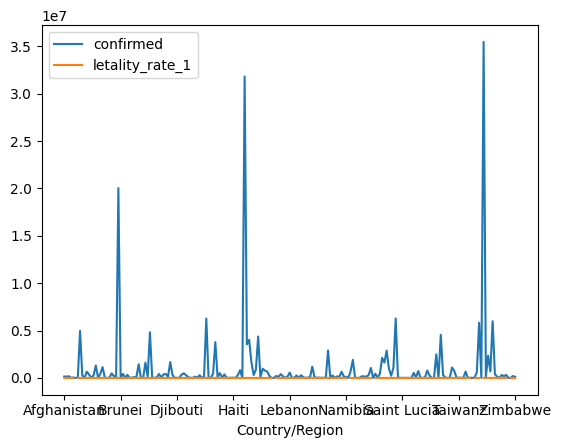

In [13]:
combined[["confirmed","letality_rate_1"]].plot()

<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

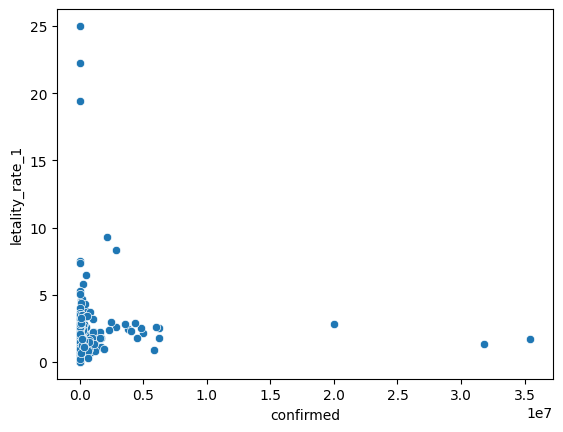

In [14]:
import seaborn as sns

sns.scatterplot(data = combined, x="confirmed", y="letality_rate_1")

In [15]:
combined.query("confirmed > 40")

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,148933,6836,82586,4.589983,7.644651
Albania,133310,2457,130314,1.843073,1.850555
Algeria,176724,4404,118409,2.492021,3.585940
Andorra,14797,128,14380,0.865040,0.882272
Angola,43158,1026,39582,2.377311,2.526596
...,...,...,...,...,...
Vietnam,181756,2327,54332,1.280288,4.107026
West Bank and Gaza,317404,3609,312320,1.137037,1.142345
Yemen,7096,1380,4251,19.447576,24.507192


<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

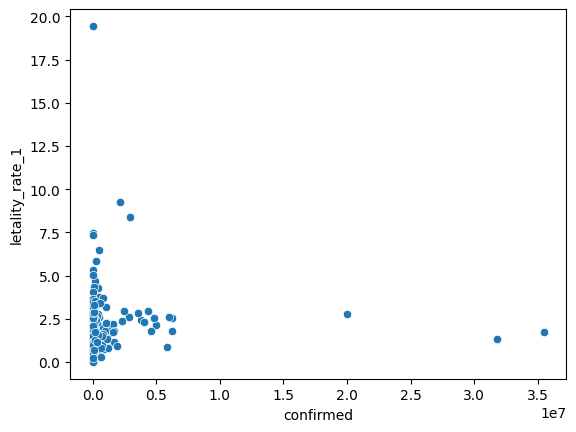

In [16]:
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="letality_rate_1")

<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

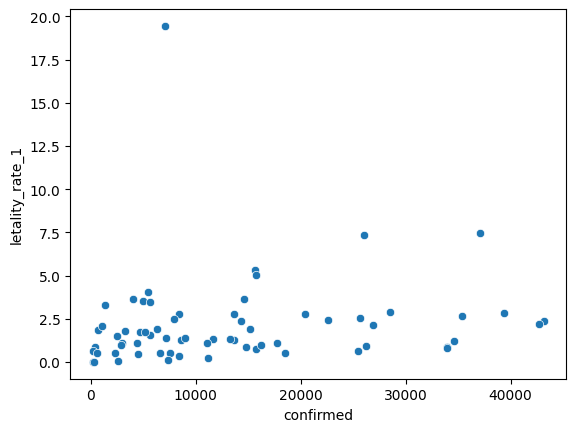

In [17]:
sns.scatterplot(data = combined.query("confirmed > 40 and confirmed < 50000"), x="confirmed", y="letality_rate_1")

<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

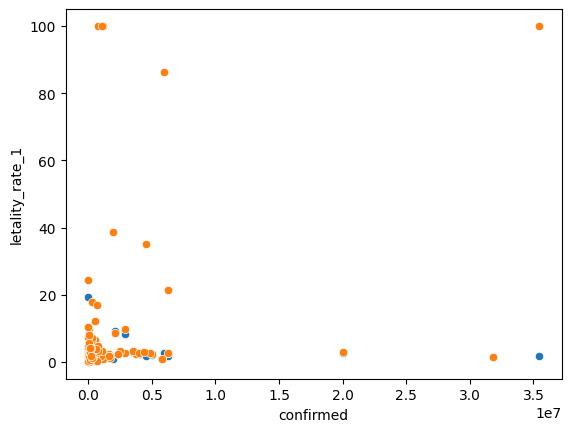

In [24]:
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="letality_rate_1")
sns.scatterplot(data = combined.query("confirmed > 40"), x="confirmed", y="letality_rate_2")

<Axes: xlabel='confirmed', ylabel='letality_rate_1'>

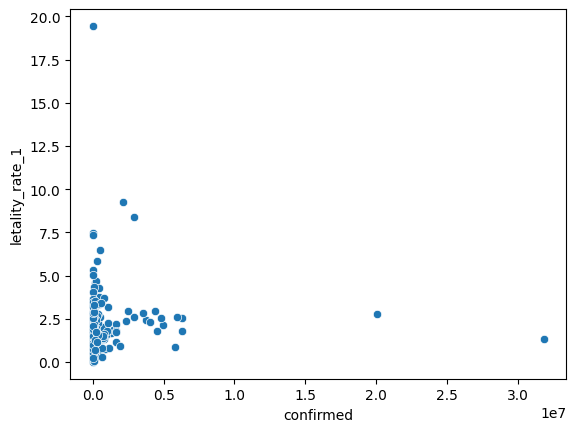

In [18]:
sns.scatterplot(data = combined.query("recovered > 40"), x="confirmed", y="letality_rate_1")

<Axes: xlabel='confirmed', ylabel='letality_rate_2'>

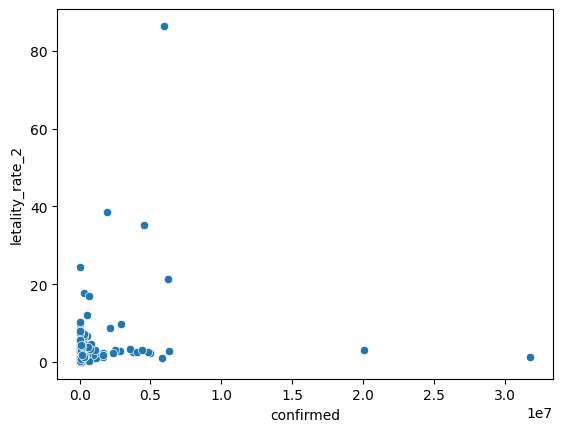

In [19]:
sns.scatterplot(data = combined.query("recovered > 40"), x="confirmed", y="letality_rate_2")

<ipython-input-20-1e74c2e7e0a1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query("recovered > 40")["letality_rate_1"])


<Axes: xlabel='letality_rate_1', ylabel='Density'>

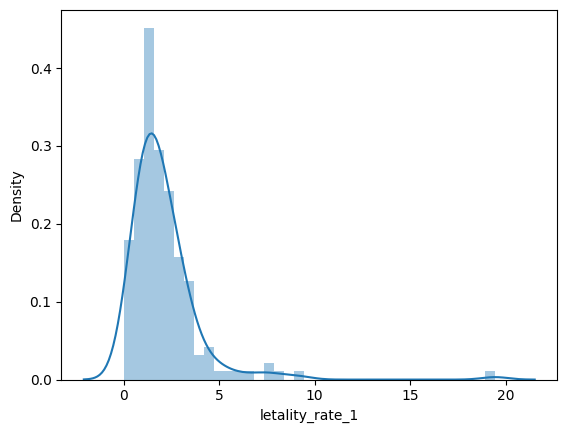

In [20]:
sns.distplot(combined.query("recovered > 40")["letality_rate_1"])

<ipython-input-21-52613fee0625>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query("confirmed > 40")["letality_rate_1"], kde=False)


<Axes: xlabel='letality_rate_1'>

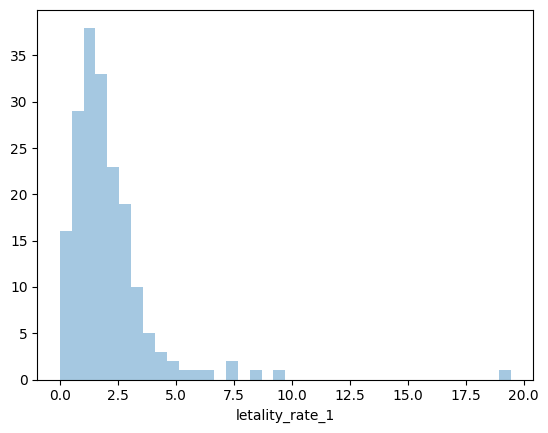

In [21]:
sns.distplot(combined.query("confirmed > 40")["letality_rate_1"], kde=False)

<ipython-input-22-8315ab3ad0e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.query("recovered > 40")["letality_rate_2"], kde=False)


<Axes: xlabel='letality_rate_2'>

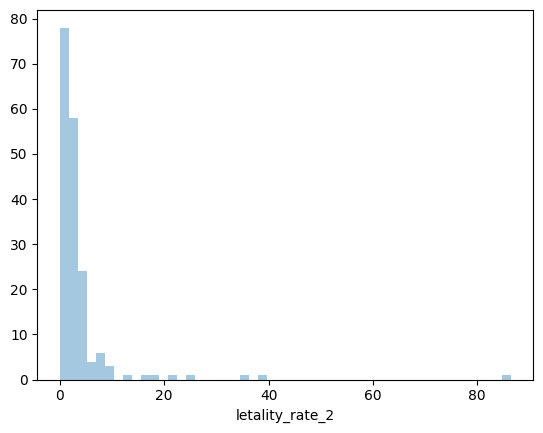

In [22]:
sns.distplot(combined.query("recovered > 40")["letality_rate_2"], kde=False)

In [23]:
combined.sort_values("letality_rate_1", ascending=False).query("confirmed > 40").head(10)

,confirmed,deaths,recovered,letality_rate_1,letality_rate_2
Country/Region,,,,,
Yemen,7096,1380,4251,19.447576,24.507192
Peru,2119068,196673,2086086,9.281108,8.615583
Mexico,2901094,242547,2270427,8.360536,9.651791
Sudan,37138,2776,30647,7.474824,8.305658
Syria,26044,1919,22019,7.368300,8.016543
Ecuador,489497,31721,443880,6.480326,6.669666
Egypt,284472,16550,232179,5.817796,6.653828
Somalia,15658,832,7661,5.313578,9.796303
Taiwan*,15742,791,12957,5.024774,5.753564


In [25]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.sum()
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.952136034428466
11.012676814644413


<ipython-input-25-d9e50be5d925>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-25-d9e50be5d925>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-25-d9e50be5d925>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]


In [28]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/20/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_2_20_20 = pd.concat(informations, axis=1)
combined_2_20_20.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_2_20_20.loc["China"]
letality_rate_1 = sum_up["deaths"] / sum_up["confirmed"]
letality_rate_2 = sum_up["deaths"] / (sum_up["deaths"] + sum_up["recovered"])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]


In [39]:
informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)
display(sum_up)

6.079208996577389


<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-28-608a5aea2bbd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]


confirmed    36814
deaths        2238
recovered    18014
Name: China, dtype: int64

In [40]:
def latest_by_country_at(data, date):
  return data.groupby("Country/Region").sum()[date]


informations = [latest_by_country_at(confirmed, '2/8/20'), latest_by_country_at(deaths, '2/20/20'), latest_by_country_at(recovered, '2/20/20')]
combined_12 = pd.concat(informations, axis=1)
combined_12.columns = ["confirmed", "deaths", "recovered"]

sum_up = combined_12.loc["China"]
letality_rate_3 = sum_up["deaths"] / sum_up["confirmed"]
print(letality_rate_3 * 100)

6.079208996577389


<ipython-input-40-ea702ddb5090>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-40-ea702ddb5090>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
<ipython-input-40-ea702ddb5090>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  return data.groupby("Country/Region").sum()[date]
